In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("EtsySoldOrderItems2020-2021-2022.csv")

In [72]:
color_map = {"Brown":1,"Gray":2,"Black":3,"Navy Blue":4,"Blue":5,"Yellow":6,"Red":7,"Pink":8,
            "Multicolered":9,"Green":10,"Beige":11,"Purple":12,"Leopar":13,"Multicolored":9,
            "Grey":2,"Multicolor":9,"Rose Gold":14,"Rainbow":15,"White":16,"No-Color":0}

In [73]:
reversed_dict = {value: key for key, value in color_map.items()}

In [74]:
def map_color(item):
    x = False
    for color, number in reversed_dict.items():
        if color == item:
            x= True
            return number
    if x == False:
        return 
df["Color"] = df["Color"].apply(map_color)

In [75]:
df.head()

,Item Model,Quantity,Price,Coupon Code,Discount Amount,Ship Country,Season,Color
0,4,1,44.67,1.0,11.17,1,0,Grey
1,1,1,52.00,1.0,13.00,1,0,Brown
2,5,1,55.33,1.0,13.83,1,0,Brown
3,1,1,62.00,1.0,15.50,1,0,Brown
4,7,1,53.00,1.0,13.25,1,0,No-Color


In [76]:
watch_band = df[df["Item Model"] == 7]

In [77]:
colors = watch_band["Color"]

In [78]:
color_percentages = colors.value_counts(normalize=True) * 100

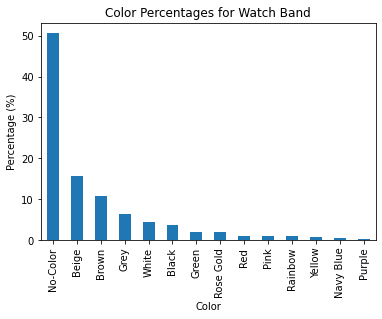

In [79]:
color_percentages.plot(kind='bar')
plt.title("Color Percentages for Watch Band")
plt.xlabel("Color")
plt.ylabel("Percentage (%)")
plt.show()

In [80]:
watch_band.drop(columns=["Item Model","Quantity","Price","Coupon Code","Discount Amount"],inplace= True) 

C:\Users\Hp\AppData\Local\Temp\ipykernel_7852\847824140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watch_band.drop(columns=["Item Model","Quantity","Price","Coupon Code","Discount Amount"],inplace= True)


In [81]:
dummy_color = pd.get_dummies(watch_band, columns=["Color"],prefix="",prefix_sep ="")

In [82]:
dummy_color.head(2)

,Ship Country,Season,Beige,Black,Brown,Green,Grey,Navy Blue,No-Color,Pink,Purple,Rainbow,Red,Rose Gold,White,Yellow
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
for col in dummy_color.columns:
    if (dummy_color[col] == 0).all():
        dummy_color.drop(col, axis=1, inplace=True)